# SUGARCANE PRODUCTION EDA PROJECT

In [9]:
# Importing libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv(r"E:\Python_2025\Python_Version_I\SugarCane.csv")

In [11]:
df.shape

(103, 7)

In [12]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [13]:
## Acreage gives us how land we have for sugarcane production

# Data Cleaning

In [14]:

df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [15]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [16]:
df = df.drop( "Unnamed: 0", axis = 1)

In [17]:
df.rename(columns= {"Production (Tons)": "Production"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield"}, inplace = True)

In [18]:
df.head()

,Country,Continent,Production,Production_per_person,Acreage,Yield
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


## CHECKING THE NULL VALUES

In [19]:
df.isnull().sum()

Country                  0
Continent                0
Production               0
Production_per_person    0
Acreage                  1
Yield                    1
dtype: int64

In [20]:
df[df["Acreage"].isnull()]    

,Country,Continent,Production,Production_per_person,Acreage,Yield
99,Djibouti,Africa,53,51,NaN,NaN


## DROPPING THE NULL VALUES

In [21]:
df = df.dropna().reset_index().drop("index", axis = 1)

In [22]:
df

,Country,Continent,Production,Production_per_person,Acreage,Yield
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


### Number of unique values

In [23]:
df.nunique()

Country                  102
Continent                  6
Production               102
Production_per_person    101
Acreage                  101
Yield                    102
dtype: int64

In [24]:
df.dtypes

Country                  object
Continent                object
Production               object
Production_per_person    object
Acreage                  object
Yield                    object
dtype: object

#### COnverting the datatypes into float

In [25]:
df.dtypes

Country                  object
Continent                object
Production               object
Production_per_person    object
Acreage                  object
Yield                    object
dtype: object

# Univariate Analysis

In [26]:
df.head()

,Country,Continent,Production,Production_per_person,Acreage,Yield
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


## Continents producing SugarCane

In [27]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

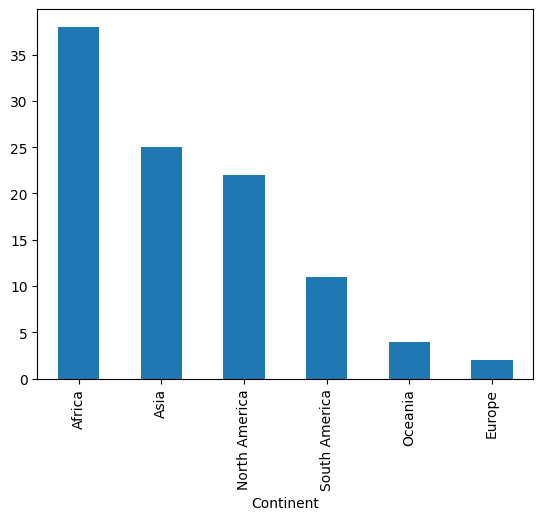

In [28]:
df["Continent"].value_counts().plot(kind = "bar")

Africa has maximum number of countries which produces sugarcane.

In [29]:
df.describe()

,Country,Continent,Production,Production_per_person,Acreage,Yield
count,102,102,102,102,102,102
unique,102,6,102,101,101,102
top,Brazil,Africa,768678382,297,584,75167.5
freq,1,38,1,2,2,1


## Checking outliers

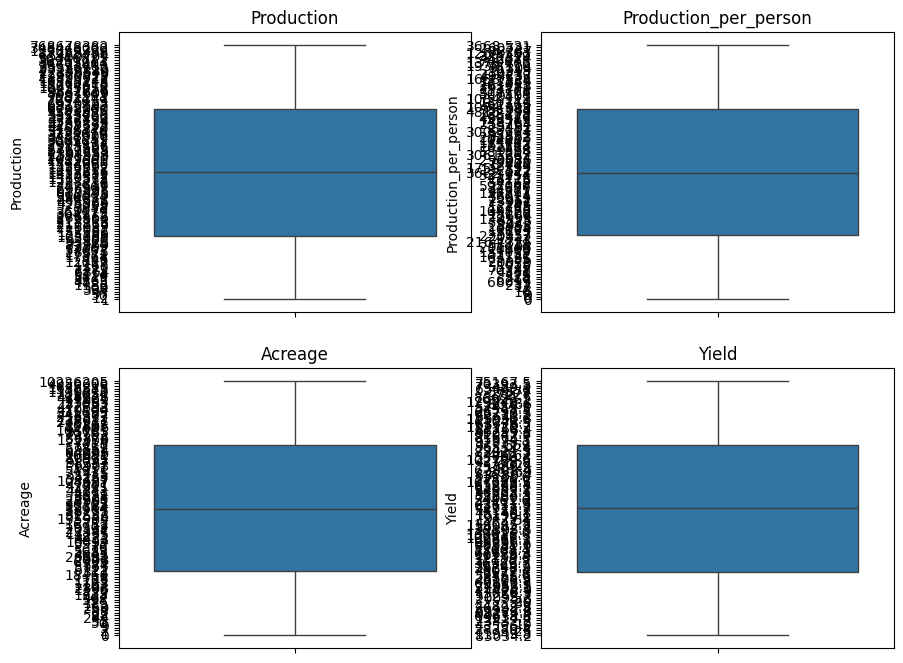

In [30]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production"])
plt.title("Production")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person"])
plt.title("Production_per_person")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage"])
plt.title("Acreage")
plt.subplot(2,2,4)
sns.boxplot(df["Yield"])
plt.title("Yield")
plt.show()

we have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.

## Distribution of the columns

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_1964\695158843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production"])
C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_1964\695158843.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person"])
C:\Users\THINKPAD\App

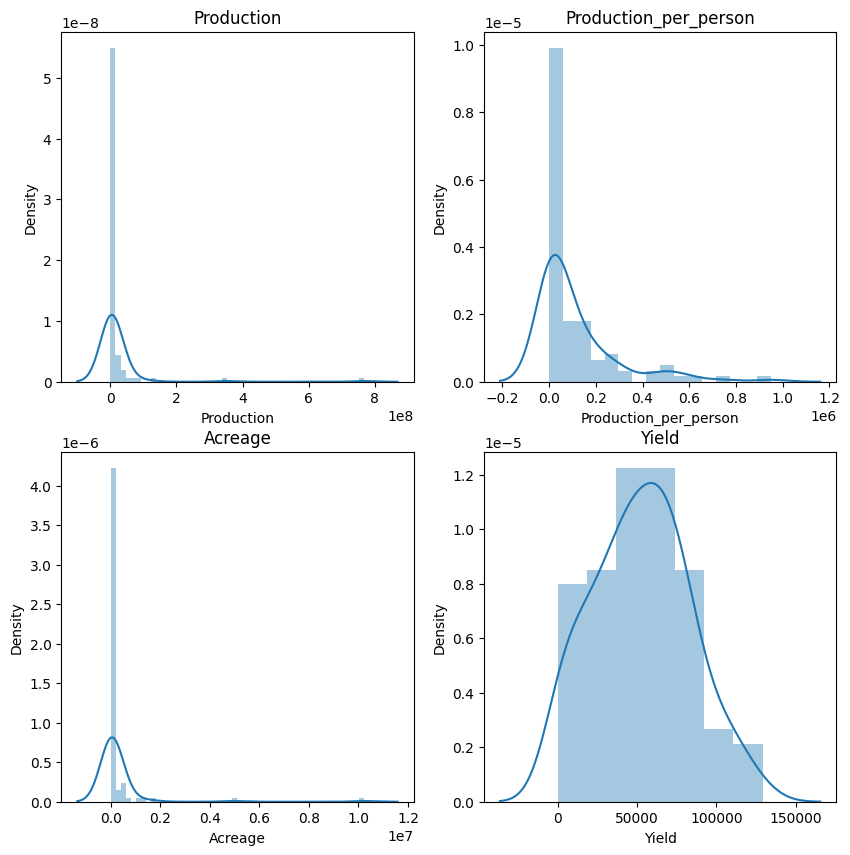

In [31]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production"])
plt.title("Production")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person"])
plt.title("Production_per_person")
plt.subplot(2,2,3)
sns.distplot(df["Acreage"])
plt.title("Acreage")
plt.subplot(2,2,4)
sns.distplot(df["Yield"])
plt.title("Yield")
plt.show()

<Axes: ylabel='Production'>

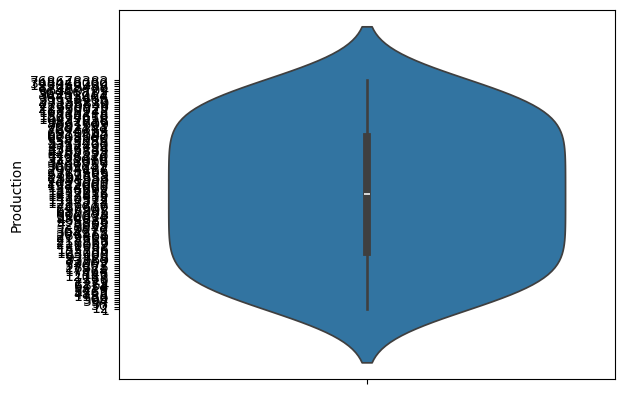

In [32]:
sns.violinplot(df["Production"])

# Bivariate Analysis

In [33]:
df.head()

,Country,Continent,Production,Production_per_person,Acreage,Yield
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


## Countries producing Maximum sugarcane

In [34]:
df_new = df[["Country","Production"]].set_index("Country")    # creating a new df with just country and production with country set as index

In [35]:
df_new

,Production
Country,
Brazil,768678382
India,348448000
China,123059739
Thailand,87468496
Pakistan,65450704
...,...
Spain,394
Lebanon,97
Singapore,50


In [36]:
df_new["Production_percent"] = df_new["Production"]*100/df_new["Production"].sum()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [37]:
df_new

,Production
Country,
Brazil,768678382
India,348448000
China,123059739
Thailand,87468496
Pakistan,65450704
...,...
Spain,394
Lebanon,97
Singapore,50


In [39]:
df.head(10)

,Country,Continent,Production,Production_per_person,Acreage,Yield
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
5,Mexico,North America,56446821,452524,781054,7227
6,Colombia,South America,36951213,740075,416626,88691.5
7,Australia,Oceania,34403004,1373.406,447204,76929.1
8,Guatemala,North America,33533403,1938.114,25985,129049.3
9,United States of America,North America,29926210,91304,37053,80766


In [38]:
df_new["Production_percent"].plot(kind = "pie", autopct = "%.2f")

KeyError: 'Production_percent'

Brazil, India and China have 65% of production of sugarcane

<Axes: xlabel='Country'>

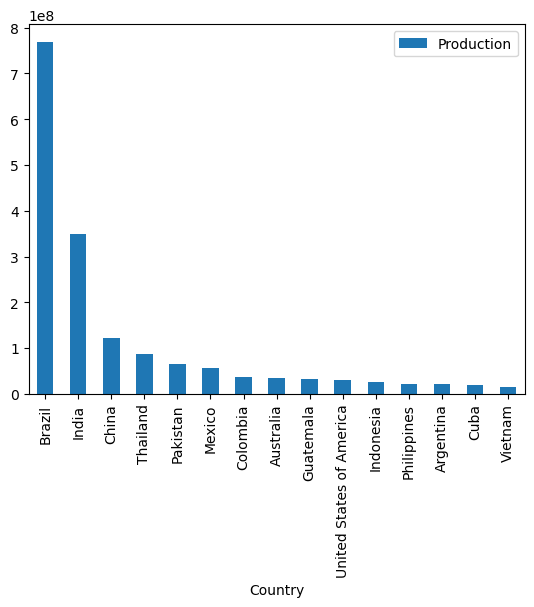

In [ ]:
df[["Country","Production"]].set_index("Country").sort_values("Production", ascending = False).head(15).plot(kind = "bar")

### Analysis : The country "Brazil" produces the maximum sugarcane out of all countries

## Country having the biggest land

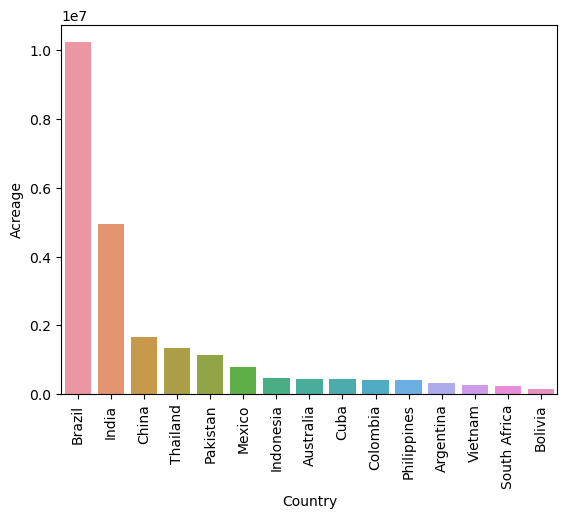

In [ ]:
df_acr = df.sort_values("Acreage", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Analysis : The country : "Brazil" has the largest land among all

## HIghest Yeild per Hectare

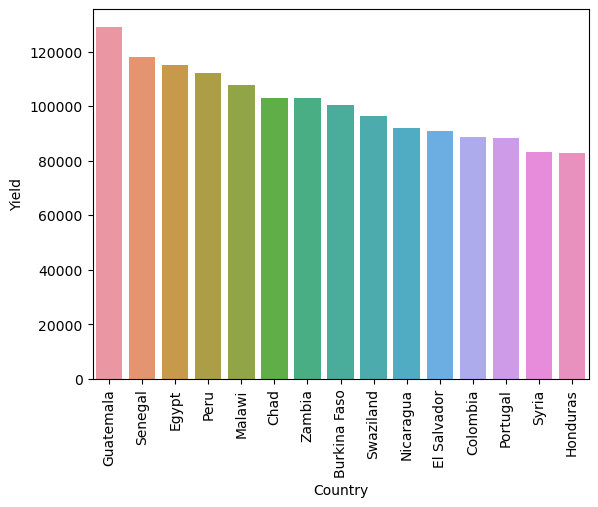

In [ ]:
df_yield = df.sort_values("Yield", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Guatemala has the highest yield per hectare

## Highest Production

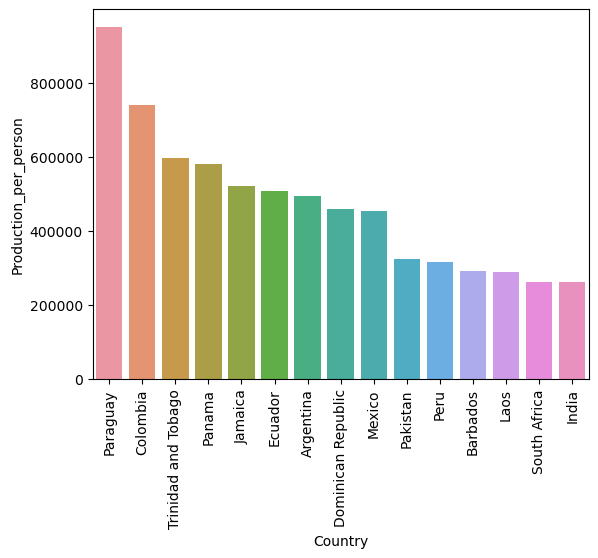

In [ ]:
df_yield = df.sort_values("Production_per_person", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Production per Person is highest in Paraguay 

## Do countries with highest land produce more sugarcane? 

<Axes: xlabel='Acreage', ylabel='Production'>

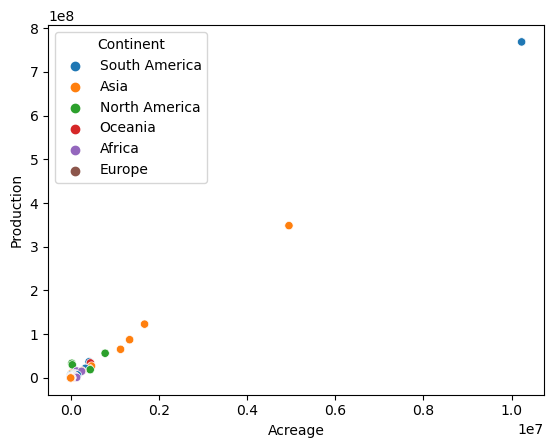

In [ ]:
sns.scatterplot(data = df, x = "Acreage", y = "Production", hue = "Continent" )

### Overall increase in land increases the production i.e. countries with highest land produces more sugarcane

## Do countries which yield more sugarcane per hectare produces more sugarcane in total? 

<Axes: xlabel='Yield', ylabel='Production'>

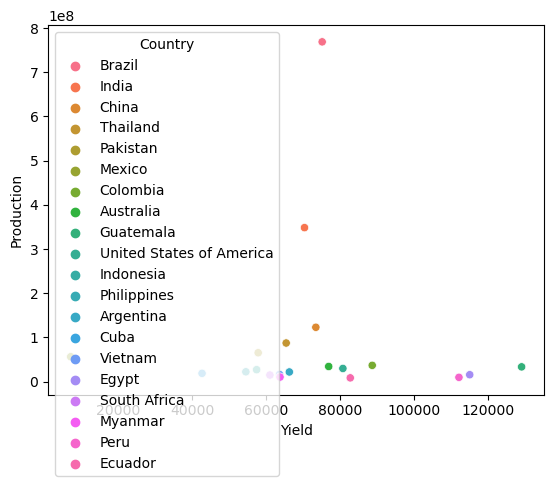

In [ ]:
sns.scatterplot(data = df.head(20), x = "Yield" , y = "Production", hue = "Country")

# Analysis for Continent

In [ ]:
df_continent = df.groupby("Continent").sum()

In [ ]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [ ]:
df_continent

,Country,Production,Production_per_person,Acreage,Yield,number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


## Which continent produces maximum sugarcane? 

<Axes: xlabel='Continent'>

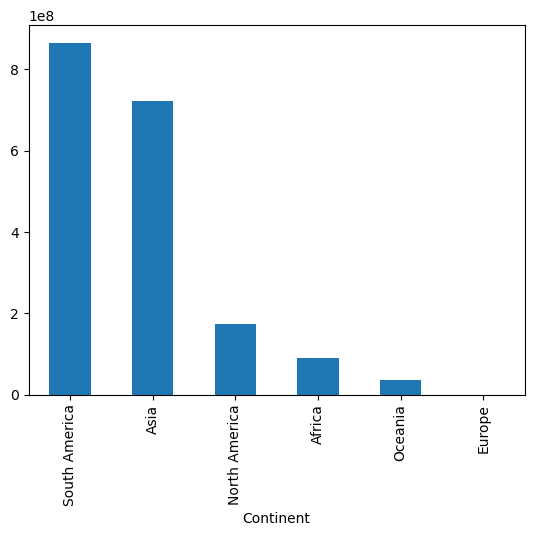

In [ ]:
df_continent["Production"].sort_values(ascending =  False).plot(kind = "bar")

### South America produces more sugarcane than the rest of the continents

## Do number of countries in a Continent effects production of sugarcane?

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


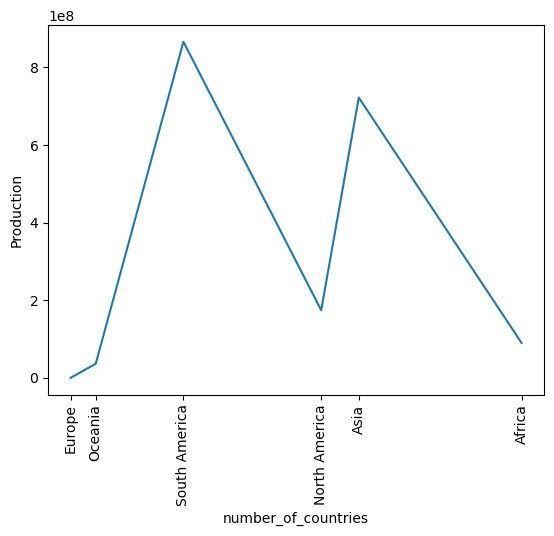

In [ ]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

### We can observe that even though Africa has highest number of countries, it produces less sugarcane

### Even though South America has around low to mid number of countries, it produces more sugarcane

## Do continent with highest land produces more sugarcane?

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Acreage', ylabel='Production'>

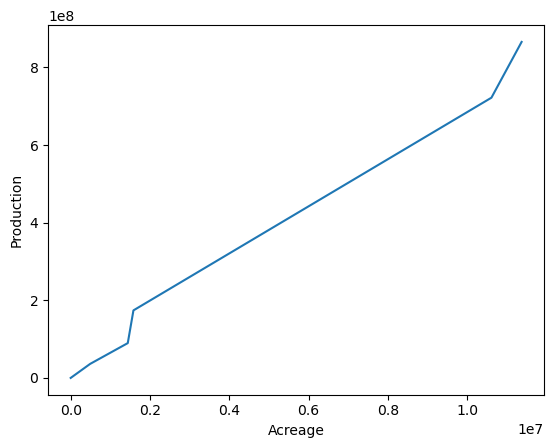

In [ ]:
sns.lineplot(data = df_continent,x = "Acreage", y= "Production" )

## Production distribution by continent

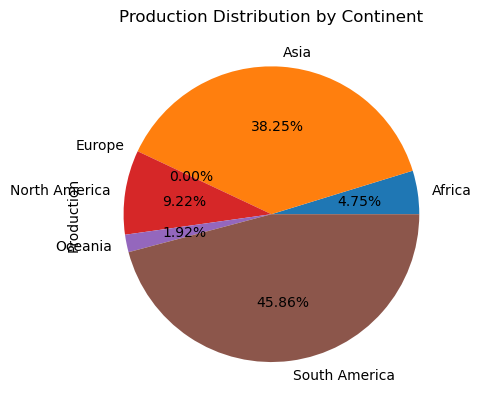

In [ ]:
df_continent["Production"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

### we can notice that south america produces around 45.86% of sugarcane and Asia produces 38.35%

### WE can also see that even though africa has highest number of continents, still produces less amount of sugarcane